# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer closer to the equator (0 Deg. Latitude). The difference between the Southern and Northern hemispheres is less than normal due to the time of year (early Fall). The temperatures at about 40 degrees North is a bit higher than at 40 degrees south, mostly due to the lingering absorbed energy that occurs immediately after the end of summer. The Southern Hemisphere is also mostly water, which moderates temperatures.
* The relationship between latitude and cloudiness / humidity is not quite as strong as expected, but it is visible in the humidity scatterplot. Most of the earth's deserts are at about 30 degrees north and south of the equator due to the earth's natural wind patterns.  In the humidity plot, the lower humidity readings do tend to be more prevalent in these latitudes, but not as obvious as the temperature patterns. 
* Strong winds are typically associated with active storms are directly between strong low and high pressure systems. While there is not a strong correlation between the latitudes and wind speed, there IS a weak relationship between cloudiness and wind speed.  With the clustering of cloudiness at about 60 degrees north latitude and a group of high wind speeds at the same latitude, there are clearly a few active storms along this latitude.

---

#### Note
* Color ramps for Temperature and Wind Speed roughly follows the National Oceanic and Atmospheric Administration's (NOAA) guidelines.
* The scatter plots have been flipped from the example provided.  This to view the city locations as they would fall on a map - with northern cities "up" on the plot and southern cities "down." Patterns related to latitude are easier to visualize if the user is familiar with viewing data on maps.
* The end of this file contains additional scatterplots with the actual global locations.  It gives a better perspective on locations.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV) Made a new one to store more data so I can play with lat/longs and maps
output_data_file = "../Outputs/cities_bonus.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
#make sure I actually have cities in the list by glancing at the first 10.
print(cities[:10])


['atuona', 'avarua', 'kaitangata', 'monrovia', 'mwinilunga', 'punta arenas', 'georgetown', 'bo rai', 'san ramon', 'ushuaia']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#set URL for openweather API and test to make sure everything works. remember to check units of measurement..
url = "http://api.openweathermap.org/data/2.5/weather?"

#set units
units = "imperial"

#partial query URL (just missing the city)
query_url = f"{url}appid={api_key}&units={units}&q="


In [5]:
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=a42af216a12a652bf36173d00e1a0b7c&units=imperial&q='

In [6]:
#test that the query URL works correctly using one of the cities in the list earlier. also verifying what to query.
testcity = "kodiak"
response = requests.get(query_url + testcity).json()
response

{'coord': {'lon': -94.76, 'lat': 39.95},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 51.98,
  'pressure': 1019,
  'humidity': 96,
  'temp_min': 51.98,
  'temp_max': 51.98},
 'visibility': 16093,
 'wind': {'speed': 10.29, 'deg': 340},
 'clouds': {'all': 90},
 'dt': 1538851980,
 'sys': {'type': 1,
  'id': 1664,
  'message': 0.0044,
  'country': 'US',
  'sunrise': 1538828468,
  'sunset': 1538869917},
 'id': 4407665,
 'name': 'Kodiak',
 'cod': 200}

#### Note the following variables needed to get the data for this homework:
* LAT: 'coord.lat' for the latitude (getting this for dataframe makes it easier for exact value)
* LONG: 'coord.lon' for the longitude. Note I added this later, so it will not show up in my testing.
* Name: 'name' for the name of the city
* City number: 'id' for the city number (unique ID)
* Temperature: 'main.temp'
* Humidity: 'main.humidity'
* Cloudiness: 'clouds.all' for cloudiness in %. Note 1 is 1%
* Wind speed: 'wind.speed' for wind speed in mph

In [7]:
#create lists to store this information
lat = []
long = []
cityname = []
citynum = []
temp = []
humidity = []
cloudiness = []
windspeed = []

In [ ]:
#test connection and generating lists. only run once to not overwhelm api and lock up my work.
#response = requests.get(query_url + "kodiak").json()
#lat.append(response['coord']['lat'])
#cityname.append(response['name'])
#citynum.append(response['id'])
#temp.append(response['main']['temp'])
#humidity.append(response['main']['humidity'])
#cloudiness.append(response['clouds']['all'])
#windspeed.append(response['wind']['speed'])
#print(f"The city number of {cityname} is '{citynum}'.")

In [ ]:
#Now run for a second time to make sure that the append works.  Again, don't want to overwhelm and request too much.
#response = requests.get(query_url + "cairns").json()
#lat.append(response['coord']['lat'])
#cityname.append(response['name'])
#citynum.append(response['id'])
#temp.append(response['main']['temp'])
#humidity.append(response['main']['humidity'])
#cloudiness.append(response['clouds']['all'])
#windspeed.append(response['wind']['speed'])
#print(f"The city number of {cityname} is '{citynum}'.") #will adjust text to only show current values in loop

#now that this worked, I will comment out the last two sections and run the loop to avoid duplicate values.

In [8]:
#Now for the loop...
#create an iterative x to show how many requests are made.
x = 1
for city in cities:
    

    response = requests.get(query_url + city).json()
    
    if response['cod']==200:
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cityname.append(response['name'])
        citynum.append(response['id'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        print(f"Made request number: {x} for city: {city}")
        x = x+1
    

Made request number: 1 for city: atuona
Made request number: 2 for city: avarua
Made request number: 3 for city: kaitangata
Made request number: 4 for city: monrovia
Made request number: 5 for city: mwinilunga
Made request number: 6 for city: punta arenas
Made request number: 7 for city: georgetown
Made request number: 8 for city: bo rai
Made request number: 9 for city: san ramon
Made request number: 10 for city: ushuaia
Made request number: 11 for city: los llanos de aridane
Made request number: 12 for city: bathsheba
Made request number: 13 for city: mataura
Made request number: 14 for city: jianhu
Made request number: 15 for city: busselton
Made request number: 16 for city: hithadhoo
Made request number: 17 for city: yenagoa
Made request number: 18 for city: dingle
Made request number: 19 for city: dikson
Made request number: 20 for city: conceicao do araguaia
Made request number: 21 for city: port hedland
Made request number: 22 for city: cape town
Made request number: 23 for city:

Made request number: 187 for city: nyurba
Made request number: 188 for city: kieta
Made request number: 189 for city: praia da vitoria
Made request number: 190 for city: dombarovskiy
Made request number: 191 for city: tosham
Made request number: 192 for city: tabas
Made request number: 193 for city: nicoya
Made request number: 194 for city: kropotkin
Made request number: 195 for city: naxos
Made request number: 196 for city: bandarbeyla
Made request number: 197 for city: stepantsevo
Made request number: 198 for city: saint george
Made request number: 199 for city: cordoba
Made request number: 200 for city: burnie
Made request number: 201 for city: gigmoto
Made request number: 202 for city: kumluca
Made request number: 203 for city: chernivtsi
Made request number: 204 for city: butaritari
Made request number: 205 for city: berlevag
Made request number: 206 for city: katherine
Made request number: 207 for city: flinders
Made request number: 208 for city: pingliang
Made request number: 20

Made request number: 372 for city: gudur
Made request number: 373 for city: hokitika
Made request number: 374 for city: hualmay
Made request number: 375 for city: qaqortoq
Made request number: 376 for city: de aar
Made request number: 377 for city: nuuk
Made request number: 378 for city: cairns
Made request number: 379 for city: vanavara
Made request number: 380 for city: aklavik
Made request number: 381 for city: lompoc
Made request number: 382 for city: carutapera
Made request number: 383 for city: tiznit
Made request number: 384 for city: aracaju
Made request number: 385 for city: khani
Made request number: 386 for city: calamar
Made request number: 387 for city: yeppoon
Made request number: 388 for city: rexburg
Made request number: 389 for city: tevaitoa
Made request number: 390 for city: longyearbyen
Made request number: 391 for city: hamilton
Made request number: 392 for city: talara
Made request number: 393 for city: san policarpo
Made request number: 394 for city: chuy
Made re

Made request number: 561 for city: ust-nera
Made request number: 562 for city: pointe michel
Made request number: 563 for city: carballo
Made request number: 564 for city: swan river


In [9]:
#create a dictionary from the results of the api call
weather_dict = {"latitude": lat, "Longitude": long, "City Name": cityname, "City Number": citynum, "Temperature": temp,
                "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": windspeed}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#create the dataframe from the dictionary & spit out the CSV file

weather_frame = pd.DataFrame(weather_dict)

weather_frame.to_csv(output_data_file, index=False)

In [11]:
#show top results...
weather_frame.head()

,latitude,Longitude,City Name,City Number,Temperature,Humidity,Cloudiness,Wind Speed
0,-9.80,-139.03,Atuona,4020109,78.28,100,92,10.07
1,-21.21,-159.78,Avarua,4035715,75.20,64,20,12.75
2,-46.28,169.85,Kaitangata,2208248,48.04,92,56,17.00
3,6.33,-10.80,Monrovia,2274895,80.60,83,75,4.70
4,-11.73,24.43,Mwinilunga,902620,66.40,55,32,2.80


### Plotting the Data

NOTE: Unlike the starter code, all scatterplots will have the latitude on the Y axis.  This will allow the city positions North/South to make more sense visually

#### First fun with coordinates.  
Plot the points on a scatterplot, but do it so it looks like a flattened globe.
Using latitude as the Y axis and Longitude as the X axis.

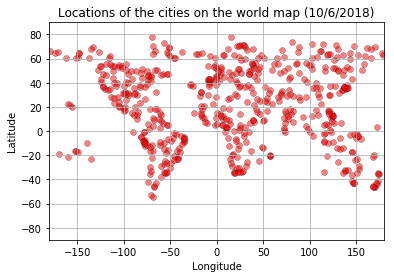

In [18]:
#First plot the lat / long to see where the cities actually are.
#Of course make sure it goes from -90 to 90 latitude, and -180 to 180 longitude...
#So this will put London dead center and the international date line on the edges.
#but to make it accurate, need to force those lat/long limits to be there.
plt.scatter(weather_frame["Longitude"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c="red", alpha=0.5)

plt.title("Locations of the cities on the world map (10/6/2018)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(axis = "both")

#force the scatterplot to show the entire map.
plt.ylim(-90,90)
plt.xlim(-180,180)

#save figure
plt.savefig("../Outputs/Lat_long_bonus.png")

#show the plot
plt.show()

#### Latitude vs. Temperature Plot

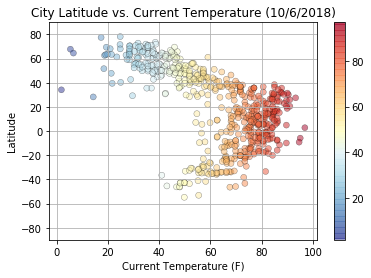

In [14]:
plt.scatter(weather_frame["Temperature"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Temperature"], cmap="RdYlBu_r", alpha=0.5)

plt.title("City Latitude vs. Current Temperature (10/6/2018)")
plt.ylabel("Latitude")
plt.xlabel("Current Temperature (F)")
plt.grid(axis = "both")

#Force the scatterplot to show the full range of possible latitudes. Highlights the lack of cities in the southern hemisphere.
plt.ylim(-90,90)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_Temp_bonus.png")

#show the plot
plt.show()



#### Latitude vs. Humidity Plot

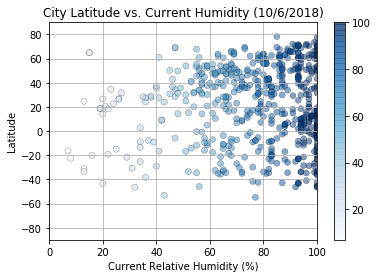

In [24]:
plt.scatter(weather_frame["Humidity"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Humidity"], cmap="Blues", vmax=100.00, alpha=0.5)

plt.title("City Latitude vs. Current Humidity (10/6/2018)")
plt.ylabel("Latitude")
plt.xlabel("Current Relative Humidity (%)")
plt.grid(axis = "both")

#Force the scatterplot to show the full range of possible latitudes. Highlights the lack of cities in the southern hemisphere.
plt.ylim(-90,90)

#due to errors in 2 stations, force the xlimit to be 100...
plt.xlim(0,100)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_Humidity_bonus.png")

#show the plot
plt.show()


#### Latitude vs. Cloudiness Plot

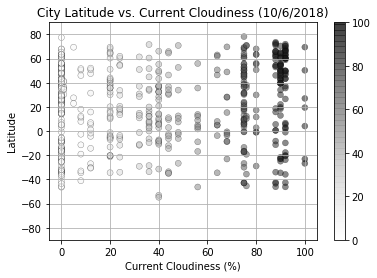

In [16]:
plt.scatter(weather_frame["Cloudiness"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Cloudiness"], cmap="Greys", alpha=0.5)

plt.title("City Latitude vs. Current Cloudiness (10/6/2018)")
plt.ylabel("Latitude")
plt.xlabel("Current Cloudiness (%)")
plt.grid(axis = "both")

#Force the scatterplot to show the full range of possible latitudes. Highlights the lack of cities in the southern hemisphere.
plt.ylim(-90,90)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_Cloudiness_bonus.png")

#show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

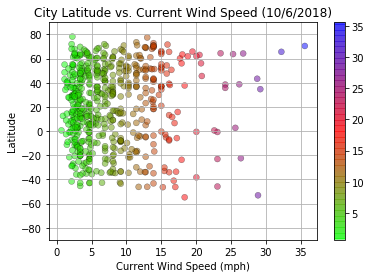

In [17]:
plt.scatter(weather_frame["Wind Speed"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Wind Speed"], cmap="brg_r", alpha=0.5)

plt.title("City Latitude vs. Current Wind Speed (10/6/2018)")
plt.ylabel("Latitude")
plt.xlabel("Current Wind Speed (mph)")
plt.grid(axis = "both")

#Force the scatterplot to show the full range of possible latitudes. Highlights the lack of cities in the southern hemisphere.
plt.ylim(-90,90)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_WindSpeed_bonus.png")

#show the plot
plt.show()

#### Bonus scatterplots!
Show the variables above on the lat/long scatterplot (show it shows as if on a map). Color the points based on the variables for better visualization.

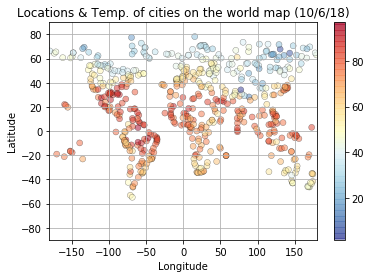

In [19]:
#plot the Cloudiness variable over the lat / long locations to give a geographic perspective.
#will color code based on that variable.
plt.scatter(weather_frame["Longitude"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Temperature"], cmap="RdYlBu_r", alpha=0.5)

plt.title("Locations & Temp. of cities on the world map (10/6/18)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(axis = "both")

#force the scatterplot to show the entire map.
plt.ylim(-90,90)
plt.xlim(-180,180)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_long_temp_bonus.png")

#show the plot
plt.show()

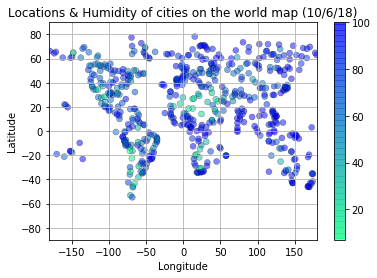

In [22]:
#plot the humidity variable over the lat / long locations to give a geographic perspective.
#will color code based on that variable.
plt.scatter(weather_frame["Longitude"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Humidity"], vmax=100.00, cmap="winter_r", alpha=0.5)

plt.title("Locations & Humidity of cities on the world map (10/6/18)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(axis = "both")

#force the scatterplot to show the entire map.
plt.ylim(-90,90)
plt.xlim(-180,180)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_long_Hum_bonus.png")

#show the plot
plt.show()

Latitude & humidity. Note that the areas of lowest humidity are clustered between 20 and 40 degrees latitude (mostly around 30).
These are the "Horse Latitudes" where winds die due to global wind patterns.  Why is it called this?  Because sailors that were stuck here before steam power were forced to eat their horses to survive (or because the ship latched onto an ocean current to move instead of wind - but the first example is more interesting).

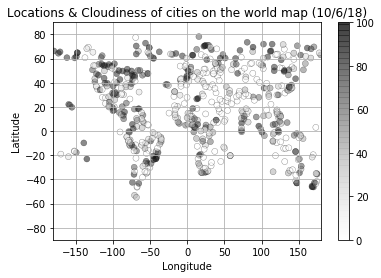

In [25]:
#plot the cloudiness variable over the lat / long locations to give a geographic perspective.
#will color code based on that variable.
plt.scatter(weather_frame["Longitude"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Cloudiness"], cmap="Greys", alpha=0.5)

plt.title("Locations & Cloudiness of cities on the world map (10/6/18)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(axis = "both")

#force the scatterplot to show the entire map.
plt.ylim(-90,90)
plt.xlim(-180,180)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_long_cloud_bonus.png")

#show the plot
plt.show()

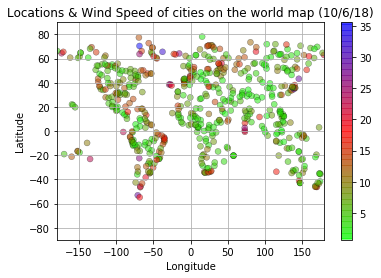

In [26]:
#plot the wind speed variable over the lat / long locations to give a geographic perspective.
#will color code based on that variable.
plt.scatter(weather_frame["Longitude"], weather_frame["latitude"], marker = "o", linewidth = 0.4, edgecolors = "black", c=weather_frame["Wind Speed"], cmap="brg_r", alpha=0.5)

plt.title("Locations & Wind Speed of cities on the world map (10/6/18)")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(axis = "both")

#force the scatterplot to show the entire map.
plt.ylim(-90,90)
plt.xlim(-180,180)

#show the color bar next to the scatterplot
plt.colorbar()

#save figure
plt.savefig("../Outputs/Lat_long_wind_bonus.png")

#show the plot
plt.show()

For wind speeds, you will notice that most of the higher wind speed results are along the coast - so is independent of the latitude.